In [5]:
import numpy as np
import matplotlib.pyplot as plt
def load_every_nth_row(filename, n=5, delimiter=' '):
    """
    Loads every nth row from a file using numpy, without loading the entire file into memory.
    Parameters:
    - filename: str, path to the file.
    - n: int, the interval for selecting rows (e.g., 5 for every 5th row).
    - delimiter: str, delimiter used in the file (default is space).
    Returns:
    - A NumPy array containing every nth row from the file.
    """
    rows = []
    # Open the file for reading
    with open(filename) as f:
        for i, line in enumerate(f):
            # Check if this is an nth row
            if i % n == 0:
                # Convert the line into a NumPy array
                row = np.fromstring(line, sep=delimiter)
                rows.append(row)
    # Convert the list of rows to a NumPy array
    return np.array(rows)

# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 5</span>

In quantum physics a **wave function**, $\Psi$, is a mathematical description of the state of a quantum system. The wave function is a complex-valued probability amplitude, and the probabilities for the possible results of measurements made on the system can be derived from it.

For now on, let's consider the simple case of a non-relativistic single particle, without spin, in three spatial dimensions. The state of such a particle is completely described by its wave function, $\Psi(\vec{r},t)$, where $\vec{r}$ is position and $t$ is time.

For one spinless particle, if the wave function is interpreted as a probability amplitude, the square modulus of the wave function, $|\Psi(\vec{r},t)|^2$, is interpreted as the probability density that the particle is at $\vec{r}$ at time $t$. Once we have a probability density, we can use Monte Carlo ...

#### Hydrogen atom
The wave functions of the eigenstates of an electron in a Hydrogen atom (this is the only atom for which the Schroedinger equation has been solved exactly) are expressed in terms of spherical harmonics and generalized Laguerre polynomials. It is convenient to use spherical coordinates, and the wave function can be separated into functions of each coordinate:

$$
\Psi_{n,l,m}(r,\theta,\phi)=
\sqrt{\left(\frac{2}{na_0}\right)^3 \frac{(n-l-1)!}{2n[(n+l)!]}}
e^{-r/na_0}\left(\frac{2r}{na_0}\right)^l L_{n-l-1}^{2l+1}\left(\frac{2r}{na_0}\right)
Y_l^m(\theta,\phi)
$$

where $a_0=4\pi\epsilon_0\hbar^2/m_e e^2=0.0529$ nm is the Bohr radius, $L_{n-l-1}^{2l+1}$ are the generalized Laguerre polynomials of degree $n-l-1$, $n=1,2,...$ is the principal quantum number, $l=0,1, ..., n-1$ the azimuthal quantum number, $m=-l, -l+1, ..., l-1, l$ the magnetic quantum number.

For example, the ground state wave function is:
$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
$$
whereas one of the three $2p$ excited state is:
$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$
Expectation values for the radius turns out to be exactly:
$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$
</span>


### Exercise 05.1


Use the Metropolis algorithm to sample $|\Psi_{1,0,0}(x,y,z)|^2$ and $|\Psi_{2,1,0}(x,y,z)|^2$ **in Cartesian coordinates** using, initially, an uniform transition probability $T(\vec{x}|\vec{y})$. Use the sampled positions to estimate $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$. As usual, use data blocking and give an estimate of the statistical uncertainties.

Show a picture of your estimations of $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^6$) as a function of the number of blocks, $N$.

- Use Bohr radius units, $a_0$ for distances
- Choose the step of the uniform transition probability $T(\vec{x}|\vec{y})$ in order to obtain 50% of acceptance in both cases
- Choose a reasonable starting point in the 3D space and equilibrate your sampling before to start measuring the radius. What do you observe when you start very far from the origin?
- How large should be the number of Monte Carlo Metropolis steps in each block?
- If you use a multivariate normal transition probability $T(\vec{x}|\vec{y})$, i.e. a Gaussian for each coordinate, your results for $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ are equivalent?


## <span style="color:purple"> Solution Exercise 05.1</span>

### Problem's Theory:
To sample a generic density probability can be used the metropolis algorithm. In this algorithm a move is proposed and each move will be accepted or rejected accordingly to a density probability $p(x)$.
To sample a probability distribution function $p(x)$, where x is a many-dimensional vector, the Metropolis technique establishes a random walk whose steps are designed so that when $N_{steps}\rightarrow \infty$, the asymptotic distribution of x is $p(x)$.
To build the correct RW we consider a **stationary markov process** so that the conditional probability related to two nearby events in the random
walk or stochastic process, $x_n$ and $x_{n+1}$ , depends only on them: $$p(x_{i+1})=\int p_{1|1}(x_{i+1}|x_i)p(x_i)dx_i=\int p_t(x_{i+1}|x_i)p(x_i)dx_i=\int k(x_{i+1}|x_i)p(x_i)dx_i  $$
where $p(x)$ is invariant with respect to its defining transition probability.

**Theorem:** given a regular transition probability $K(x|y)$ such that $p(x)$ is invariant for $K$ follows that: $$ p(x)=\lim_{n \rightarrow \infty}d_{n+1}(x)=\lim_{n \rightarrow \infty}\int K(x|y)d_n(y)dy \space \forall d_1(x)$$

The idea behind the Metropolis algorithm is to find a regular transition probability in order to sample the desired probability distribution.  From the detailed balance follows that $p(x)$ is invariant from $K$. Writing $K$ as a trial transition probability multiplied with the probability to accept a move: $K(x_{i+1}|x_i)=T(x_{i+1}|x_i)A(x_{i+1}|x_i)$ we are ready to build the metropolis algorithm that is based on two different phases:

- **propose a step**: each step is proposed with a transition probability $T(x_i|x_{i+1})$. Starting from the current position $x_i$ is proposed a move in the 3D space. The lenght of the step is $\delta$ and will determine the acceptance ratio.
- **accept/reject the step proposed**: the probability to accept a move is determined by the Metropolis acceptance rule: $$ A(x_i|x_{i+1})=\min\left[1,\frac{T(x_i|x_{i+1})p(x_{i+1})}{T(x_{i+1}|x_{i})p(x_{i})}\right]=\min\left[1,\frac{p(x_{i+1})}{p(x_{i})}\right]$$ where the last equivalence is justified by the fact that the transition probability is symmetric.\
In this case $p(x)=|\psi(\vec{r},t)|^2$. The move is always accepted if $p(x_{i+1})\ge p(x_i)$, while is accepted with probability $\frac{p(x_{i+1})}{p(x_i)}$ in the other case.
The lenght of the step must be chosen so that the acceptance rate is $\approx 50\%$. This is important because:
- if the step is too small the move proposed will likely be accepted but the step will be correlated
- if the step is too big it will be rejected in the most of the cases and so the algorthm will be inefficient.
### Problem's approach:
To solve this exercise i have created a derived class `Metropolis` from `Block Average`. The class `Metropolis` implement a new `calculate` method that is the metropolis one. When calculate is called the algorithm propose a move to update the position of the Random Walk. The lenght of the step is sampled with a Gaussian or a uniform probability distribution.\
Proposed the move, the algorithm accepts it if $A=\min\left[1,\frac{p(x_{i+1})}{p(x_{i})}\right]$ is greater than a random number with uniform distribution $[0,1)$. If the move is accepted the position is updated otherwise another move will be proposed. This function return the distance from the origin so to calculate the distance with the blocking method.\
If the RW starts very far from the origin there's an initial bias in the average computation, to obviate this problem i have implemented a method named `equilibration` that proposes $10^6$ moves before the average calculation so that the RW reasonably reaches the interested position.\
To set the correct maximum increment of the move i have implemented a method named `set_a` where with an accept/reject tecnique is computed and updated the maximum lenght of the jump so to have a ratio close to $50\%$.
### Code:
the `calculate` method:
```cpp
double Metropolis::calculate(double value,Random &rnd) const{
            if(m_save_traj) _file.open(_string,std::ios::app);
            // Determine the dimensionality from m_r
            int dimension = m_r.n_elem;
            //cout << "dimension = " << dimension << endl;
            vec vec_rand(dimension);
            if (m_gaussian) {
                for (int i = 0; i < dimension; ++i) {
                    vec_rand(i) = rnd.Gauss(0, m_a);
                }
            } else {
                for (int i = 0; i < dimension; ++i) {
                    vec_rand(i) = rnd.Rannyu(-m_a, m_a);
                }
            }
            vec vec_rnew=m_r+vec_rand;
            // Handle spherical coordinates if necessary
            vec coord(dimension), newcoord(dimension);
            if(m_spherical_coordinates) {
                cartesianToSpherical(m_r, coord);
                cartesianToSpherical(vec_rnew, newcoord);
            } else {
                coord = m_r;
                newcoord = vec_rnew;
            }
            double p = pow(m_f(coord),2);
            double pnew = pow(m_f(newcoord),2);
            double A = min(1.,pnew/p);
            double accept = rnd.Rannyu(0,1);
            if (accept <= A) {
                    m_r = vec_rnew;
                    double value = m_g(m_r);
                    if (m_save_traj) {
                        for (int i = 0; i < dimension; ++i) {
                            _file << m_r(i) << (i == dimension - 1 ? "\n" : "\t");
                        }
                        _file.close();
                    }
                    return value;
                } else {
                    double value = m_g(m_r);
                    if (m_save_traj) _file.close();
                    return value;
                }
            }
```
the `Set_a` method:
```cpp
    void Metropolis::Set_a(...){
        int Nhit=0;
        double a=x_start; double ratio; double difference; double increment=initial_increment; double previous_difference;
        // Initialize vectors for the current position and new position
        vec x(dimension, arma::fill::zeros);
        vec xnew(dimension, arma::fill::zeros);
        vec rand_vec(dimension);
        // Spherical coordinate vectors
        vec coord(dimension);
        vec newcoord(dimension);
        for(;;){
            Nhit=0;
            for(int i=0;i<Nstep;i++){
                // Generate random displacements
                for(int d=0;d<dimension;d++){
                    if(m_gaussian){
                        rand_vec(d) = rnd.Gauss(0, a);
                    }else{
                        rand_vec(d) = rnd.Rannyu(-a, a);}
                }
                // Update the position
                xnew = x + rand_vec;
                // Convert to spherical coordinates if necessary
                if (m_spherical_coordinates) {
                    cartesianToSpherical(x, coord);
                    cartesianToSpherical(xnew, newcoord);
                } else {
                    coord = x;
                    newcoord = xnew;
                }
                // Calculate acceptance probability
                double p = pow(m_f(coord),2);
                double pnew = pow(m_f(newcoord),2);
                double A = min(1.,pnew/p);
                double r = rnd.Rannyu(0,1);
                // Accept or reject the new position
                if (r <= A) {Nhit++;x=xnew;}
                // Calculate the acceptance ratio
                ratio = static_cast<double>(Nhit)/Nstep;
            }
            // Check if the ratio is within the tolerance range
            if (fabs(ratio-target_ratio) < tolerance) {m_a=a;break;}
            // Adjust increment based on the difference
            if (ratio <= target_ratio) {a *= 0.9;}else{a *= 1.1;}
            previous_difference = difference;
            if(a<0){a=increment;}

            }
    }
```
the `equilibrate` method:
```cpp
    void Metropolis::Equilibrate(int Nstep,Random &rnd){
        // Determine the dimensionality from m_r
        for(int i=0;i<Nstep;i++){
            calculate(0,rnd);
        }
    }
```
### Plot parameters:
- for the block average
  - $N_{blocks}=500$
  - $L_{blocks}=10^4$
- for the maximum leght of the jump
  - $N_{step}=10^4$
  - $\delta_{start}=1$
  - $initial\_increment=0.3$
  - $tolerance=0.001$
  - $target\_ratio=0.5$
- for the random walk
  - $r_{start}=\{a_0,0,0\}$
  - $probability\ distributions= \psi_{1,0,0}\space \&\space \psi_{2,1,0}$
  - $Observable\ to\ measure=\sqrt{||\vec{r}||^2}$
### Results:
- The first $4$ plots show the different trajectories sampled by the random walks for the uniform and the gaussian probability distribution for the ground and for the excited states. As we can see the result are coherent with what we expected.

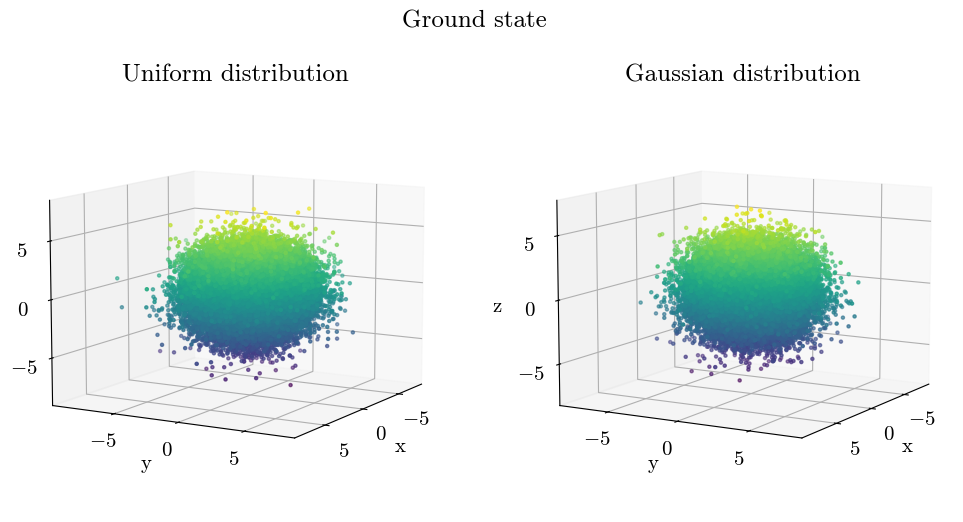

In [34]:
#font CMU Serif
plt.rcParams.update({'font.family': 'cmr10','font.size':'15','axes.formatter.use_mathtext':'True','mathtext.fontset':'cm'})
data1 = load_every_nth_row("RW_ground_uniform.dat",n=100)
data2 = load_every_nth_row("RW_ground_gauss.dat",n=100)
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(12, 6))
fig.suptitle('Ground state')
X1=data1[::,0]
Y1=data1[::,1]
Z1=data1[::,2]
ax1.scatter(X1, Y1, Z1, c=Z1, marker='.')
ax1.set_title('Uniform distribution')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(10, 30)
X2=data2[::,0]
Y2=data2[::,1]
Z2=data2[::,2]
ax2.scatter(X2, Y2, Z2, c=Z2, marker='.')
ax2.set_title('Gaussian distribution')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.view_init(10, 30)

In this two plots are shown the trajectories of the Random walks sampled with a **uniform** and a **gaussian** distribution for the **ground state** of the hydrogen atom. As expected the ground state has a spherical simmetry. As we can see the trajectories don't need an equilibration phase where the walker is far from the probability.

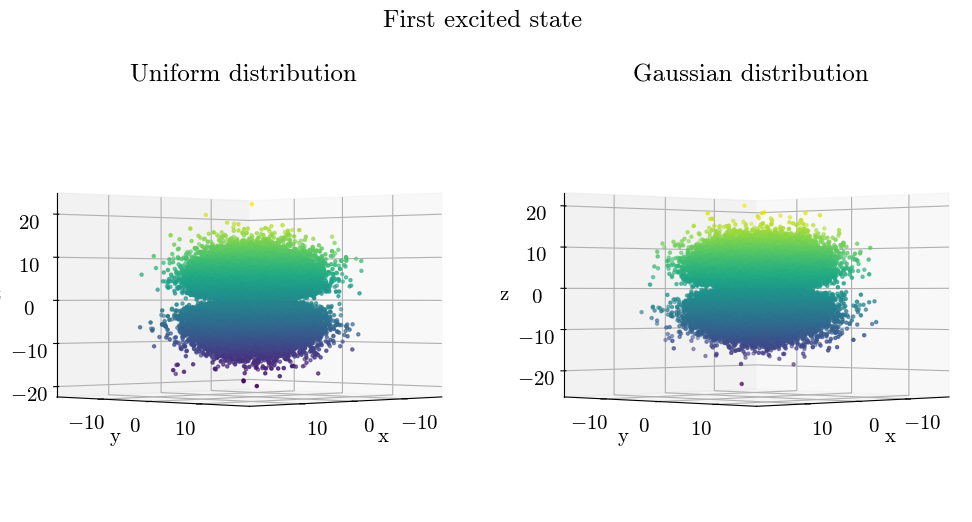

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(12, 6))
data3 = load_every_nth_row("RW_excited_uniform.dat",n=100)
data4 = load_every_nth_row("RW_excited_gauss.dat",n=100)
fig.suptitle('First excited state')
X3=data3[::,0]
Y3=data3[::,1]
Z3=data3[::,2]
ax1.scatter(X3, Y3, Z3, c=Z3, marker='.')
ax1.set_title('Uniform distribution')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(0, 45)
X4=data4[::,0]
Y4=data4[::,1]
Z4=data4[::,2]
ax2.scatter(X4, Y4, Z4, c=Z4, marker='.')
ax2.set_title('Gaussian distribution')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.view_init(0, 45)


In this plots are shown the Random Walks of the first **exited states** sampled with a **uniform** and **gaussian** distribution. We note the bilobal structure expected, the simmetry with respect to the origin. Even in this case we note that no equilibration is needed because the Random Walks started close to the probability.

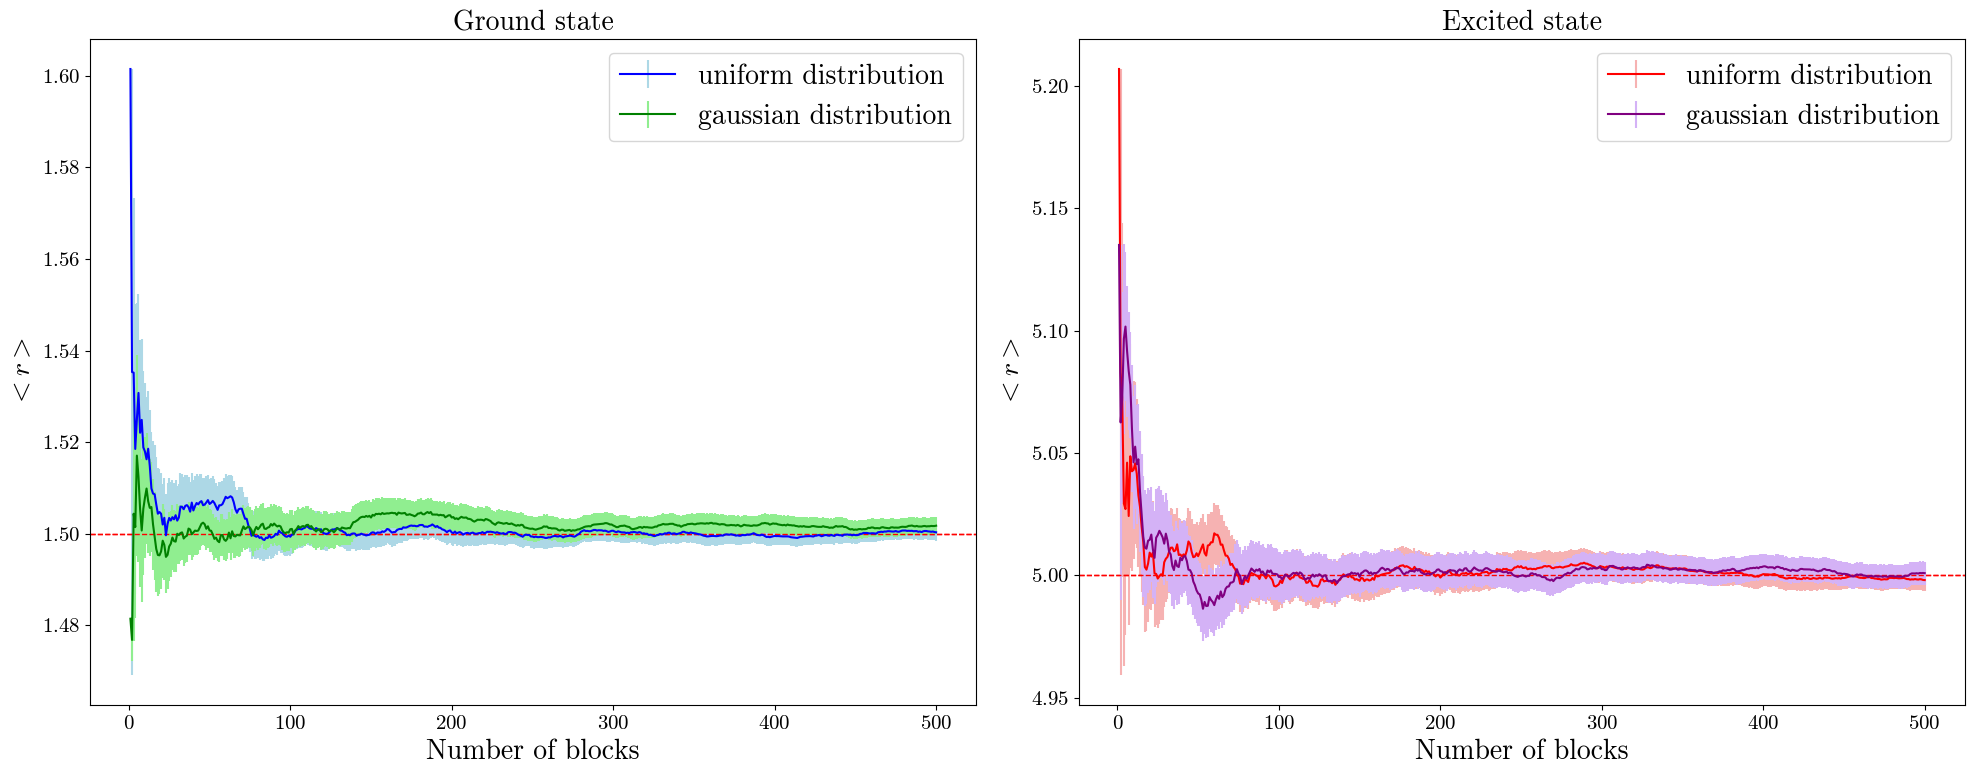

In [54]:
#load data for <r> value 
files=["ex_05.1_ground_uniform.dat","ex_05.1_ground_gauss.dat","ex_05.1_excited_uniform.dat","ex_05.1_excited_gauss.dat"]
titles=['Ground state','Ground state','Excited state','Excited state']
labels=['uniform distribution','gaussian distribution','uniform distribution','gaussian distribution']
indexes=[0,0,1,1]
lines=[1.5,1.5,5,5]
fig,ax = plt.subplots(1,2,figsize=(20,8))
colors=['blue','green','red','purple']
ecolors=['lightblue','lightgreen','#F6B2B2','#D4B2F6']
for file,index,color,ecolor,title,label,line in zip(files,indexes,colors,ecolors,titles,labels,lines):
    data = np.loadtxt(file, skiprows=1)
    blocks=data[:,0]
    measures=data[:,1]
    errors=data[:,2]
    ax[index].errorbar(blocks,measures,yerr=errors,color=color,ecolor=ecolor,label=label)
    ax[index].axhline(line, color='red', linestyle='--', linewidth=1)  # Dashed red line at y=0
    ax[index].set_xlabel('Number of blocks',fontsize=20)
    ax[index].set_ylabel(f'$<r>$',fontsize=20)
    ax[index].set_title(title,fontsize=20)
    ax[index].legend(fontsize=20)
plt.tight_layout()
    

In the two plots above are shown the measures of the mean distance from the origin $\left< r \right>$ of the Random Walks' trajectories for the ground and excited state of the hydrogen atom. For each quantum state the Metropolis algorithm has been sampled proposing a step with a uniform or a gaussian ditribution. As we can see there are no big differences in the results that are compatible with what expected from the theory.

### Start simulation far from the origin 
Previously we started our Random search in $\{a_0,0,0\}$ that is close to the higher value of the probability density so an equilibration was not needed. In this second part we restarted our sampling very far from the origin $\vec{r}_{start}=\{100a_0,100a_0,100a_0\}$.  

Text(0.5, 0, 'z')

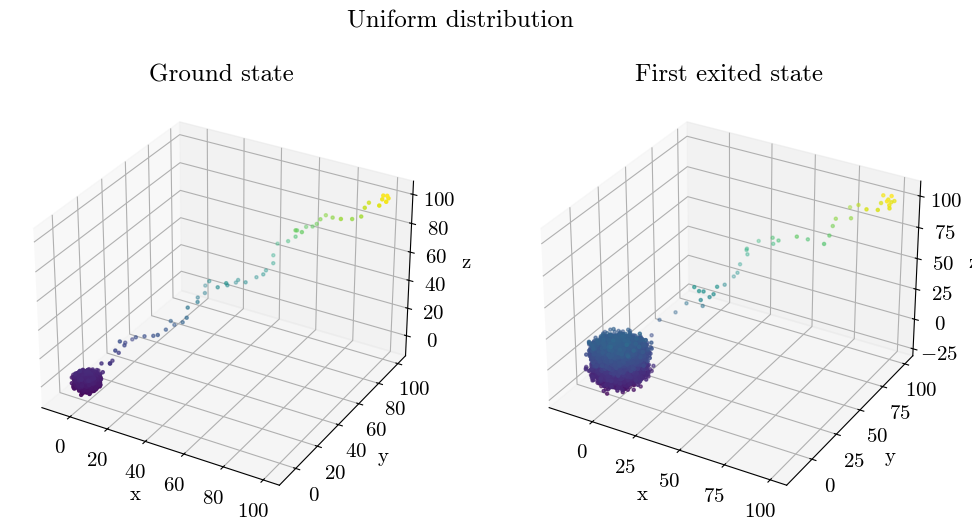

In [36]:
#font CMU Serif
plt.rcParams.update({'font.family': 'cmr10','font.size':'15','axes.formatter.use_mathtext':'True','mathtext.fontset':'cm'})
data1 = load_every_nth_row("RW_ground_uniform_far.dat",n=10)
data2 = load_every_nth_row("RW_excited_uniform_far.dat",n=5)
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(12, 6))
fig.suptitle('Uniform distribution')
X1=data1[::,0]
Y1=data1[::,1]
Z1=data1[::,2]
ax1.scatter(X1, Y1, Z1, c=Z1, marker='.')
ax1.set_title('Ground state')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
#ax1.view_init(10, 30)
X2=data2[::,0]
Y2=data2[::,1]
Z2=data2[::,2]
ax2.scatter(X2, Y2, Z2, c=Z2, marker='.')
ax2.set_title('First exited state')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
#ax2.view_init(10, 30)

In this two plots are shown the trajectories of the Random Walks in the ground and first excited state of the hydrogen atom with a uniform transition probability. As we can see, firstly the walkers get close to high values of the probability densities ad then explore the distribution in the 3D space. Starting far from the origin **equilibration is needed** before start measuring.

Text(0.5, 0, 'z')

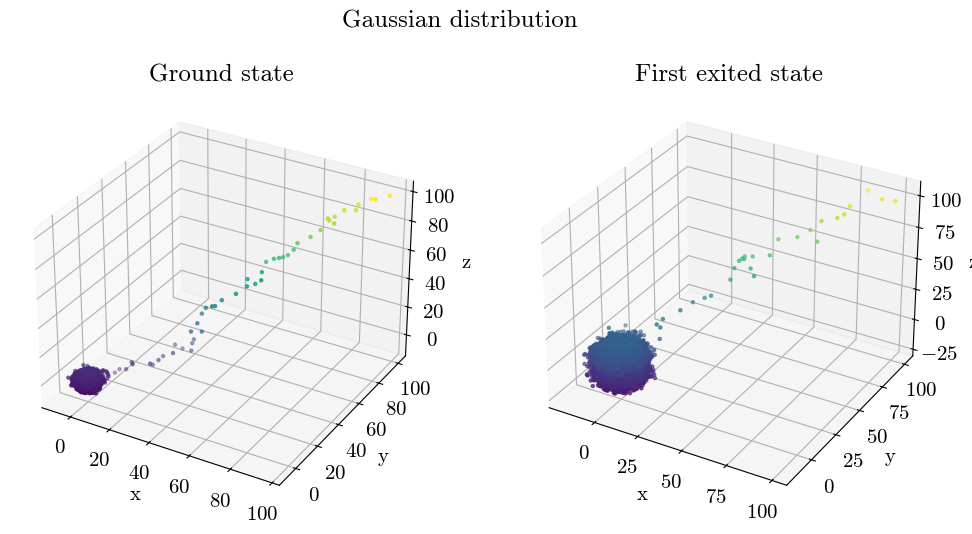

In [4]:
#font CMU Serif
plt.rcParams.update({'font.family': 'cmr10','font.size':'15','axes.formatter.use_mathtext':'True','mathtext.fontset':'cm'})
data1 = load_every_nth_row("RW_ground_gauss_far.dat",n=10)
data2 = load_every_nth_row("RW_excited_gauss_far.dat",n=5)
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(12, 6))
fig.suptitle('Gaussian distribution')
X1=data1[::,0]
Y1=data1[::,1]
Z1=data1[::,2]
ax1.scatter(X1, Y1, Z1, c=Z1, marker='.')
ax1.set_title('Ground state')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
#ax1.view_init(10, 30)
X2=data2[::,0]
Y2=data2[::,1]
Z2=data2[::,2]
ax2.scatter(X2, Y2, Z2, c=Z2, marker='.')
ax2.set_title('First exited state')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
#ax2.view_init(10, 30)

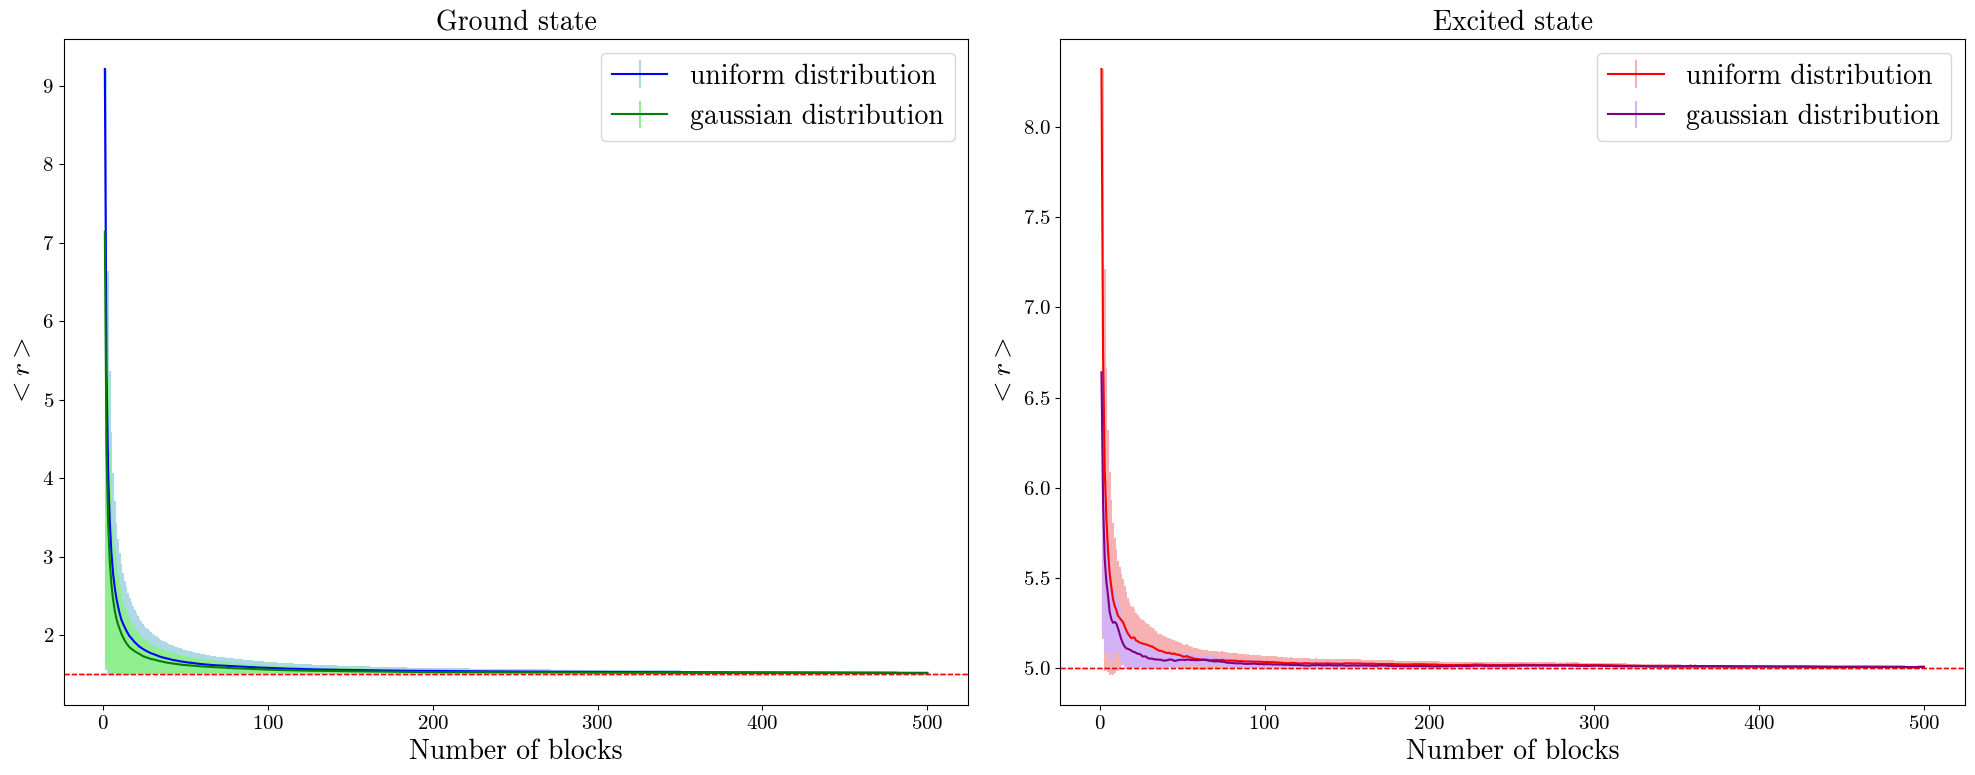

In [20]:
#load data for <r> value 
files=["ex_05.1_ground_uniform_far.dat","ex_05.1_ground_gauss_far.dat","ex_05.1_excited_uniform_far.dat","ex_05.1_excited_gauss_far.dat"]
titles=['Ground state','Ground state','Excited state','Excited state']
labels=['uniform distribution','gaussian distribution','uniform distribution','gaussian distribution']
indexes=[0,0,1,1]
lines=[1.5,1.5,5,5]
fig,ax = plt.subplots(1,2,figsize=(20,8))
colors=['blue','green','red','purple']
ecolors=['lightblue','lightgreen','#F6B2B2','#D4B2F6']
for file,index,color,ecolor,title,label,line in zip(files,indexes,colors,ecolors,titles,labels,lines):
    data = np.loadtxt(file, skiprows=1)
    blocks=data[:,0]
    measures=data[:,1]
    errors=data[:,2]
    ax[index].errorbar(blocks,measures,yerr=errors,color=color,ecolor=ecolor,label=label)
    ax[index].axhline(line, color='red', linestyle='--', linewidth=1)  # Dashed red line at y=0
    ax[index].set_xlabel('Number of blocks',fontsize=20)
    ax[index].set_ylabel(f'$<r>$',fontsize=20)
    ax[index].set_title(title,fontsize=20)
    ax[index].legend(fontsize=20)
plt.tight_layout()

As we can see after 300 blocks the system are equilibrated so i decided to equilibrate the systems in $N_{step}=3\times 10^6$. The convergence of the Random Walks with gaussian distributed transition matrix seem a bit faster than the uniform ones. That might be because the Random Walk with gaussian distributed transition matrix can make bigger jumps than the uniform distributed one.

### Simulation after Equilibration

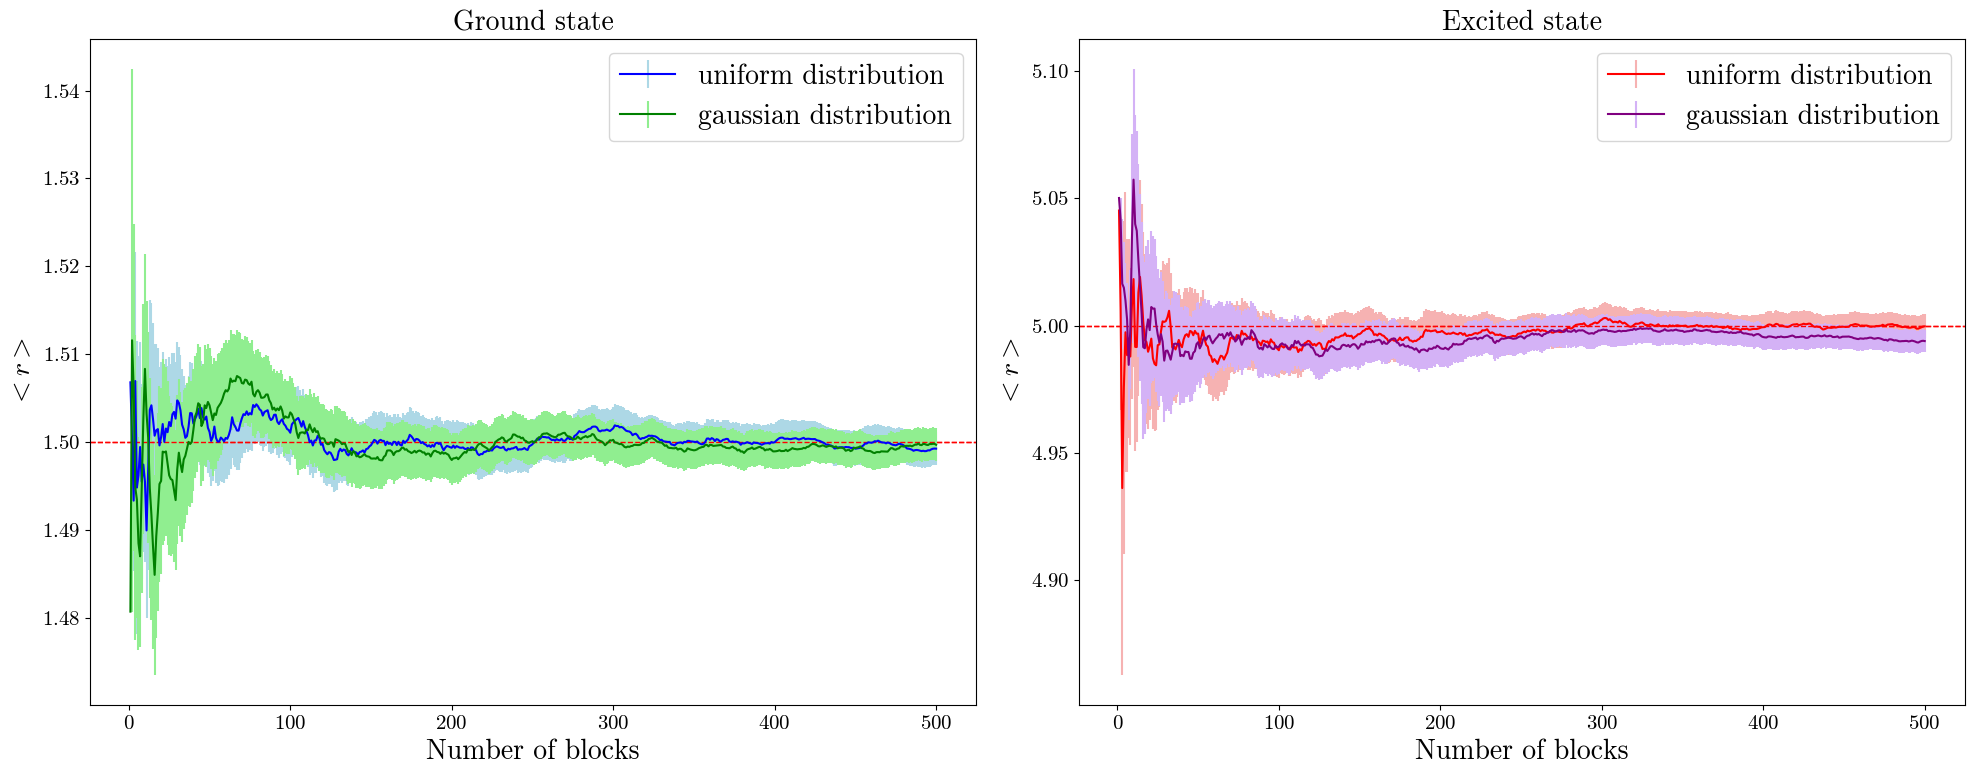

In [37]:
#load data for <r> value 
files=["ex_05.1_ground_uniform_far_eq.dat","ex_05.1_ground_gauss_far_eq.dat","ex_05.1_excited_uniform_far_eq.dat","ex_05.1_excited_gauss_far_eq.dat"]
titles=['Ground state','Ground state','Excited state','Excited state']
labels=['uniform distribution','gaussian distribution','uniform distribution','gaussian distribution']
indexes=[0,0,1,1]
lines=[1.5,1.5,5,5]
fig,ax = plt.subplots(1,2,figsize=(20,8))
colors=['blue','green','red','purple']
ecolors=['lightblue','lightgreen','#F6B2B2','#D4B2F6']
for file,index,color,ecolor,title,label,line in zip(files,indexes,colors,ecolors,titles,labels,lines):
    data = np.loadtxt(file, skiprows=1)
    blocks=data[:,0]
    measures=data[:,1]
    errors=data[:,2]
    ax[index].errorbar(blocks,measures,yerr=errors,color=color,ecolor=ecolor,label=label)
    ax[index].axhline(line, color='red', linestyle='--', linewidth=1)  # Dashed red line at y=0
    ax[index].set_xlabel('Number of blocks',fontsize=20)
    ax[index].set_ylabel(f'$<r>$',fontsize=20)
    ax[index].set_title(title,fontsize=20)
    ax[index].legend(fontsize=20)
plt.tight_layout()

After equilibration the measures are biassed and the block average compute correctly the values of the mean distances even if the Metropolis algorithm starts far from the origin.